In [1]:
#Abalone Case Study practice project


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv(r'C:\ProgramData\abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df.shape

# there are 4177 rows and 9 columns in given dataset

(4177, 9)

In [13]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# Above data shows that there 4177 rows and 9 columns ,all columns being of float datatype except Rings column ,
#which is of integer type and sex column which is of object type.All the values are not null in the dataset
#  In the data there is one categorical variables (Sex) to study ,rest are numerical variables

In [14]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# Ring variable values ranges from 2 to 29 rings . 
# Most frequent values of Rings are highly concentrated around the median of the distribution

In [15]:
# checking null values in dataset

df.isnull().sum()

# below data shows ,there are no null values in dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

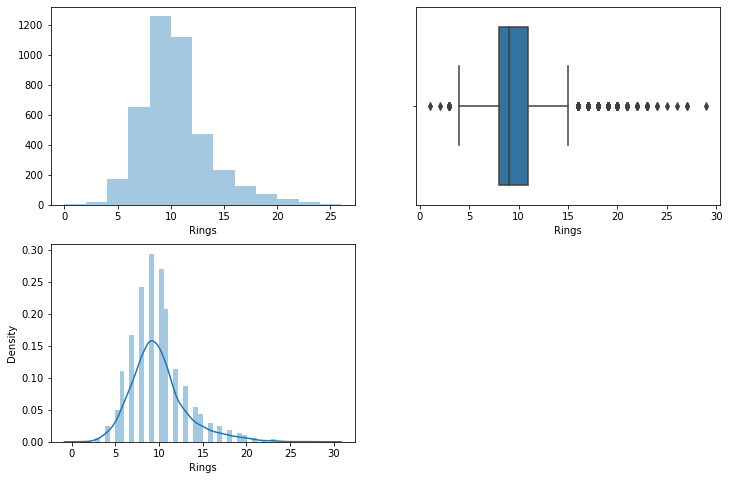

In [36]:
# Analysing Ring variable through distribution plot,box plot 

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['Rings'], kde=False, bins=range(0, 28, 2));
plt.subplot(2,2,2)
sns.boxplot(df['Rings']);
plt.subplot(2,2,3)
sns.distplot(df['Rings']);

In [ ]:
# We can find outlier in Rings column

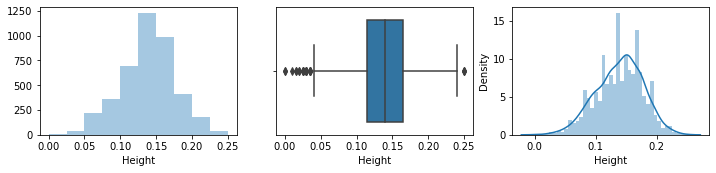

In [34]:
# Analyzing abalone height using histogram,box plot

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,8))
plt.subplot(3,3,7)
sns.distplot(df['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(df['Height']);
plt.subplot(3,3,9)
sns.distplot(df['Height']);

In [ ]:
# we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. 
#Analyzing the Height boxplot we find that the high peak is formed due the presence of two observations that lie far 
#beyond the central positions of the distribution.Thats outlier.

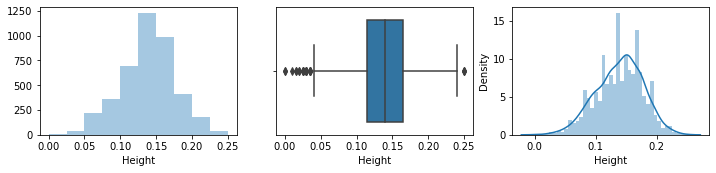

In [35]:
# we filter these outliers in order to obtain an approximate normal distribution of the Height variable 

import warnings
warnings.filterwarnings("ignore")

df = df[df['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(3,3,7)
sns.distplot(df['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(df['Height']);
plt.subplot(3,3,9)
sns.distplot(df['Height']);

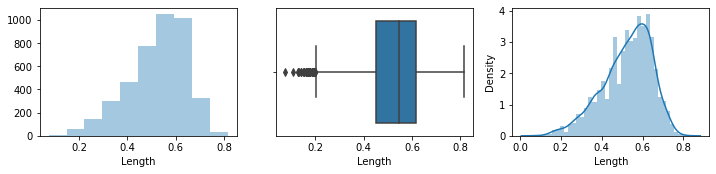

In [37]:
# Analyzing abalone length using histogram,box plot

import warnings
warnings.filterwarnings("ignore")
                        
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(df['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(df['Length']);
plt.subplot(3,3,3)
sns.distplot(df['Length']);

In [ ]:
# For abalone length , we observe an approximate normal distribution

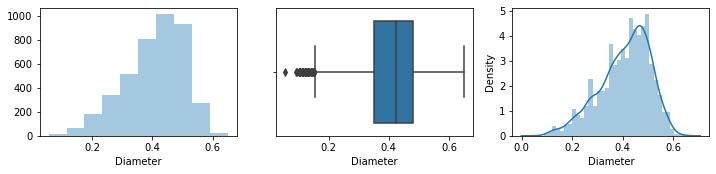

In [39]:
# Analyzing abalone diameter using histogram,box plot

import warnings
warnings.filterwarnings("ignore")
                        
plt.figure(figsize=(12,8))
plt.subplot(3,3,4)
sns.distplot(df['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(df['Diameter']);
plt.subplot(3,3,6)
sns.distplot(df['Diameter']);

In [ ]:
# For abalone diameter , we observe an approximate normal distribution

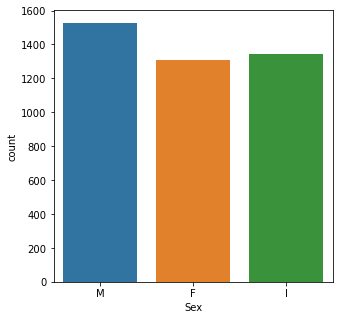

In [41]:
#  counting each category of sex feature with a bar plot

plt.figure(figsize=(5,5))
sns.countplot(df['Sex']);

In [ ]:
# Clearly above plot shows that the dataset is balanced.

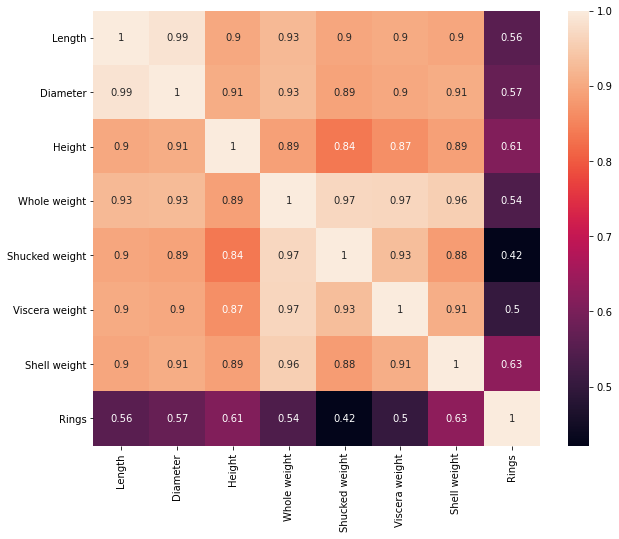

In [43]:
# Correlation Matrix (to find the correlation between independent variables and rings variable)

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True);

In [ ]:
# Analyzing the correlation matrix, we notice that Height and Shell weight are most correlated to Rings variable

In [44]:
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627815
Height            0.609634
Diameter          0.574792
Length            0.556827
Whole weight      0.540859
Viscera weight    0.504234
Shucked weight    0.421442
Name: Rings, dtype: float64

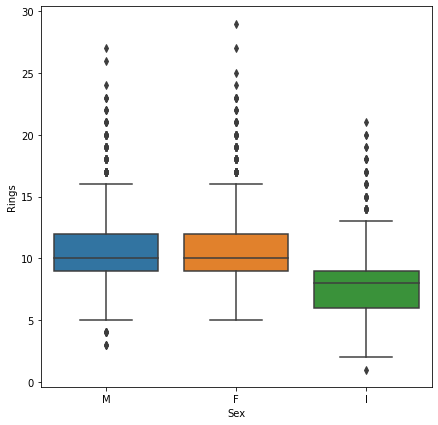

In [45]:
# Analyzing influence of sex variable on Rings

plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='Sex', y='Rings');


# Mostly samples are concentrated around the mean of the distribution.
# The difference is that for Infant abalones the mean of Rings is lower.

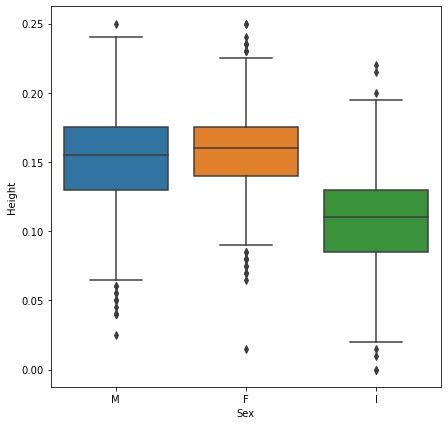

In [46]:
# Analyzing influence of sex variable on Height

plt.figure(figsize=(7, 7))
sns.boxplot(data=df, x='Sex', y='Height');

In [ ]:
# Analyzing influence of sex variable on Shell weight

plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Shell weight');

In [2]:
# converting  categorical variable to numeric variable with label encoder to make uniform data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Detecting outlier and removing it

import numpy as np

from scipy import stats
df_outlier= df.copy()
z = np.abs(stats.zscore(df_outlier))
print(z)

[[1.15198011 0.57455813 0.43214879 ... 0.72621157 0.63821689 1.57154357]
 [1.15198011 1.44898585 1.439929   ... 1.20522124 1.21298732 0.91001299]
 [1.28068972 0.05003309 0.12213032 ... 0.35668983 0.20713907 0.28962385]
 ...
 [1.15198011 0.6329849  0.67640943 ... 0.97541324 0.49695471 0.28962385]
 [1.28068972 0.84118198 0.77718745 ... 0.73362741 0.41073914 0.02057072]
 [1.15198011 1.54905203 1.48263359 ... 1.78744868 1.84048058 0.64095986]]


In [4]:
# Defining threshold to identify an outlier

threshold = 3
print(np.where(z > 3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [5]:
df_outlier=df_outlier[(z < 3).all(axis=1)]
df.shape

(4177, 9)

In [6]:
df_outlier.shape

(4027, 9)

In [7]:
# Separating input features and output features

X = df_outlier.drop('Rings', axis = 1) 
y = df_outlier. Rings 

In [16]:
# # Splitting data into training and test data
# Training the RandomForestRegressor model 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor()

score_s=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    rfr.fit(X_train, y_train)
    y_predicted=rfr.predict(X_test)
    mse=np.sqrt(mean_squared_error(y_test,y_predicted))
    if mse>score_s:
        score_s=mse
        state=i
        
print('best random_state : ',state)
print('mean_squared_error : ',score_s)




best random_state :  7
mean_squared_error :  2.0766462272977253


In [32]:

# finding predicted values of x_test using best random state through train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =7)
rfr.fit(X_train, y_train)
y_predicted=rfr.predict(X_test)

print('root_mean_squared_error : ', np.sqrt(mean_squared_error(y_test,y_predicted)))

root_mean_squared_error :  2.072106690617922


In [ ]:
# Above result of Root Mean Squared Error clearly shows that model is good enough 

In [25]:
# Exporting the model through pickle

import pickle
filename='Abalone_rings.pkl'
pickle.dump(rfr,open(filename,'wb'))


In [26]:
# Conclusion:

import numpy as np
a=np.array(y_test)
predicted=np.array(rfr.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,9,8.47
1,5,4.80
2,12,12.25
3,12,11.09
4,11,10.90
...,...,...
1204,9,7.80
1205,15,12.16
1206,9,9.84
1207,6,5.37
